<a href="https://colab.research.google.com/github/grizzler88/Springboard/blob/master/20%20Data%20Storytelling/Ireland_House_Prices_2010_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irish Housing Market (2010-2018)

## Import Packages and Read File

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Property_Price_Register_Ireland-05-04-2019.csv')

In [4]:
df.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,"€185,000.00",No,Yes,New Dwelling house /Apartment
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment


In [5]:
df.dtypes

Date of Sale (dd/mm/yyyy)    object
Address                      object
Postal Code                  object
County                       object
Price (€)                    object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
dtype: object

In [6]:
for col in df.columns:
  print(col, df[col].nunique())

Date of Sale (dd/mm/yyyy) 3136
Address 335973
Postal Code 31
County 26
Price (€) 23110
Not Full Market Price 2
VAT Exclusive 2
Description of Property 6


## Tidy Data

### Price

Price data is an object so we need to transform it into float data type.

In [7]:
df['Price (€)'] = df['Price (€)'].str.replace('€', '')
df['Price (€)'] = df['Price (€)'].str.replace(',', '')
df['Price (€)'] = df['Price (€)'].astype('float')

In [8]:
df.dtypes

Date of Sale (dd/mm/yyyy)     object
Address                       object
Postal Code                   object
County                        object
Price (€)                    float64
Not Full Market Price         object
VAT Exclusive                 object
Description of Property       object
dtype: object

In [9]:
df.rename(columns={'Price (€)': 'Price'}, inplace=True)

### Date of Sale

Date of Sale data is an object so we need to transform it into datetime data type.

In [10]:
df['Date of Sale'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], dayfirst=True)

In [11]:
df['Year'] = df['Date of Sale'].dt.year
df['Month'] = df['Date of Sale'].dt.month_name()

Review to make sure date format correctly applied.

In [12]:
df[['Date of Sale (dd/mm/yyyy)', 'Date of Sale', 'Month']].sample(10)

,Date of Sale (dd/mm/yyyy),Date of Sale,Month
339502,16/11/2018,2018-11-16,November
148856,31/03/2015,2015-03-31,March
227377,08/11/2016,2016-11-08,November
350937,24/01/2019,2019-01-24,January
8876,23/06/2010,2010-06-23,June
163267,21/07/2015,2015-07-21,July
137225,22/12/2014,2014-12-22,December
50689,25/07/2012,2012-07-25,July
125813,23/10/2014,2014-10-23,October
28641,01/07/2011,2011-07-01,July


Dataset is should only be until 05/04/19. Next piece of code is to confirm this.

In [13]:
rev_2019 = df[df['Year'] == 2019][['Date of Sale', 'Year', 'Month', 'Price']]

In [14]:
rev_2019.head()

,Date of Sale,Year,Month,Price
348795,2019-01-01,2019,January,60671.0
348796,2019-01-01,2019,January,30000.0
348797,2019-01-01,2019,January,30000.0
348798,2019-01-01,2019,January,130000.0
348799,2019-01-01,2019,January,15000.0


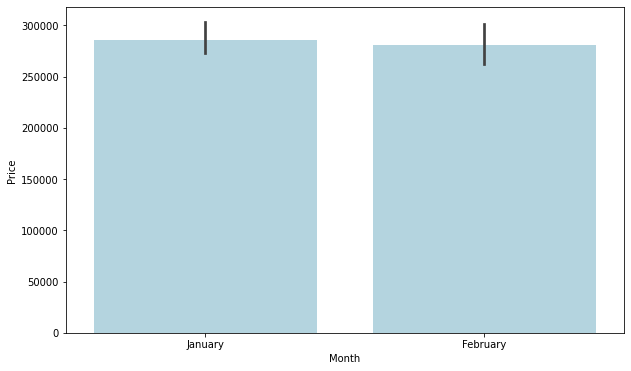

In [15]:
_ = plt.figure(figsize=(10,6))
_ = sns.barplot(data=rev_2019, x='Month', y='Price', color='lightblue')

plt.show()

I will remove 2019 data as this is not for full year. I will also remove the original 'Date of Sale (dd/mm/yyyy)' as this is no longer required with new date field.

In [16]:
df = df[df['Year'] != 2019]

In [17]:
df.drop(columns=['Date of Sale (dd/mm/yyyy)'], inplace=True)

Review dataset to make sure code correctly altered.

In [18]:
df.dtypes

Address                            object
Postal Code                        object
County                             object
Price                             float64
Not Full Market Price              object
VAT Exclusive                      object
Description of Property            object
Date of Sale               datetime64[ns]
Year                                int64
Month                              object
dtype: object

In [19]:
df.head()

,Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale,Year,Month
0,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,2010,January
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,No,Yes,New Dwelling house /Apartment,2010-01-03,2010,January
2,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,2010,January
3,"1 The Haven, Mornington",NaN,Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,2010,January
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,2010,January


In [20]:
df.shape

(348795, 10)

### Property Type

Next, I will look at Property Types to see if this can be altered. 

Reviewing it shows that some unique values are in English and others as Gaelige. My Irish is not great but I do remember that 'teach' means house as Gaelige, and 'nua' means new. This gives me enough information to group the Irish and English unique values into two name - New or Existing.

In [21]:
df['Description of Property'].value_counts()

Second-Hand Dwelling house /Apartment    294812
New Dwelling house /Apartment             53954
Teach/Árasán Cónaithe Atháimhe               26
Teach/Árasán Cónaithe Nua                     2
Teach/?ras?n C?naithe Nua                     1
Name: Description of Property, dtype: int64

In [22]:
df['Property Type'] = df['Description of Property'].str.replace('Second-Hand Dwelling house /Apartment', 'Existing').replace('New Dwelling house /Apartment', 'New').replace('Teach/Árasán Cónaithe Atháimhe', 'Existing').replace('Teach/Árasán Cónaithe Nua', 'New').replace('Teach/?ras?n C?naithe Nua', 'New').replace('Second-Hand', 'Exiting')

In [23]:
df['Property Type'].value_counts()

Existing    294838
New          53957
Name: Property Type, dtype: int64

In [24]:
df.drop(columns='Description of Property', inplace=True)

### VAT and Full Market Price

Both these variables are 'Yes' or 'No' so will leave as is. I will update name to make easier to call in future.

In [25]:
df['VAT Exclusive'].value_counts()

No     296114
Yes     52681
Name: VAT Exclusive, dtype: int64

In [26]:
df['Not Full Market Price'].value_counts()

No     332750
Yes     16045
Name: Not Full Market Price, dtype: int64

In [27]:
df.rename(columns={'VAT Exclusive': 'VAT_exc', 'Not Full Market Price':'Not_Full_Price'}, inplace=True)

### Postal Code

Postal Codes have number of categories in Irish and is also the only column to contain NaN values. 

In [28]:
df['Postal Code'].value_counts()

Dublin 15               7874
Dublin 18               4618
Dublin 24               4161
Dublin 8                3902
Dublin 4                3844
Dublin 7                3603
Dublin 9                3582
Dublin 11               3361
Dublin 13               3275
Dublin 12               3120
Dublin 14               3117
Dublin 6                3016
Dublin 16               2993
Dublin 3                2855
Dublin 5                2517
Dublin 1                2290
Dublin 22               1750
Dublin 2                1350
Dublin 10                867
Dublin 20                826
Dublin 17                792
Dublin 6w                519
Ní Bhaineann               4
Baile Átha Cliath 3        2
Baile Átha Cliath 18       2
Baile Átha Cliath 9        1
Baile Átha Cliath 15       1
Baile ?tha Cliath 17       1
Baile Átha Cliath 4        1
Baile Átha Cliath 14       1
Baile Átha Cliath 5        1
Name: Postal Code, dtype: int64

In [29]:
df['Postal Code'] = df['Postal Code'].str.replace('Baile Átha Cliath', 'Dublin').replace('Baile ?tha Cliath 17', 'Dublin 17').replace('Ní Bhaineann', 'n/a')

In [30]:
df['Postal Code'].value_counts()

Dublin 15    7875
Dublin 18    4620
Dublin 24    4161
Dublin 8     3902
Dublin 4     3845
Dublin 7     3603
Dublin 9     3583
Dublin 11    3361
Dublin 13    3275
Dublin 12    3120
Dublin 14    3118
Dublin 6     3016
Dublin 16    2993
Dublin 3     2857
Dublin 5     2518
Dublin 1     2290
Dublin 22    1750
Dublin 2     1350
Dublin 10     867
Dublin 20     826
Dublin 17     793
Dublin 6w     519
n/a             4
Name: Postal Code, dtype: int64

In [31]:
df['Postal Code'].isnull().sum(axis = 0)

284549

### NaN Values

Postal Code is only column with null values to deal with. We will fill these values with 'n/a' for time-being.

In [32]:
for x in df.columns:
  print(x, ' number of Null Values: ', df[x].isnull().sum(axis = 0))

Address  number of Null Values:  0
Postal Code  number of Null Values:  284549
County  number of Null Values:  0
Price  number of Null Values:  0
Not_Full_Price  number of Null Values:  0
VAT_exc  number of Null Values:  0
Date of Sale  number of Null Values:  0
Year  number of Null Values:  0
Month  number of Null Values:  0
Property Type  number of Null Values:  0


In [33]:
df = df.fillna('n/a')

In [34]:
df['Postal Code'].isnull().sum(axis = 0)

0

In [35]:
df['Postal Code'].value_counts()

n/a          284553
Dublin 15      7875
Dublin 18      4620
Dublin 24      4161
Dublin 8       3902
Dublin 4       3845
Dublin 7       3603
Dublin 9       3583
Dublin 11      3361
Dublin 13      3275
Dublin 12      3120
Dublin 14      3118
Dublin 6       3016
Dublin 16      2993
Dublin 3       2857
Dublin 5       2518
Dublin 1       2290
Dublin 22      1750
Dublin 2       1350
Dublin 10       867
Dublin 20       826
Dublin 17       793
Dublin 6w       519
Name: Postal Code, dtype: int64

### County

There are 26 counties in Ireland and all are represented in the data.

In [36]:
df['County'].nunique()

26

In [37]:
df['County'].value_counts()

Dublin       113989
Cork          38042
Galway        17912
Kildare       16659
Meath         13229
Limerick      13038
Wexford       11758
Wicklow       10542
Kerry         10254
Donegal        9614
Tipperary      9157
Waterford      9130
Louth          9100
Mayo           8259
Clare          8101
Westmeath      6681
Cavan          5518
Kilkenny       5455
Laois          5243
Sligo          5219
Roscommon      4967
Offaly         4119
Carlow         3772
Leitrim        3224
Longford       3025
Monaghan       2788
Name: County, dtype: int64

### Address

I looked at splitting the Address field. While this would be useful for analysis - due to how messy this field is and given the scope of this project - I will leave making this too precise for now.

In [38]:
df.dtypes

Address                   object
Postal Code               object
County                    object
Price                    float64
Not_Full_Price            object
VAT_exc                   object
Date of Sale      datetime64[ns]
Year                       int64
Month                     object
Property Type             object
dtype: object

In [39]:
df[['Address 1', 'Address 2', 'Address 3']] = df['Address'].str.split(',', expand=True)

In [40]:
for col in df.columns:
  print(col, df[col].nunique())

Address 332641
Postal Code 23
County 26
Price 22974
Not_Full_Price 2
VAT_exc 2
Date of Sale 3102
Year 9
Month 12
Property Type 2
Address 1 288504
Address 2 47081
Address 3 13304


In [41]:
df['Address 3'].value_counts()

 DUBLIN                11310
 CORK                   9509
 GALWAY                 5984
 LIMERICK               5093
 KILDARE                4040
                       ...  
 Ballyfoyle                1
 KYLEBRACK LOUGHREA        1
 Ridgewoods  Swords        1
 RUSBBROOK                 1
 Ballylarkin               1
Name: Address 3, Length: 13304, dtype: int64

## EDA

### Outliers

Plots below show that there is a signficant number of outliers in the upper end of the data.

In [42]:
df.describe()

,Price,Year
count,3.487950e+05,348795.000000
mean,2.403005e+05,2014.918984
std,6.355327e+05,2.388066
min,5.079000e+03,2010.000000
25%,1.040000e+05,2013.000000
50%,1.800000e+05,2015.000000
75%,2.850000e+05,2017.000000
max,1.391650e+08,2018.000000


In [43]:
df['Price_thousands'] = df['Price'] / 1000

In [44]:
df['Year'] = df['Year'].astype('object')

In [45]:
df.describe()

,Price,Price_thousands
count,3.487950e+05,348795.000000
mean,2.403005e+05,240.300536
std,6.355327e+05,635.532718
min,5.079000e+03,5.079000
25%,1.040000e+05,104.000000
50%,1.800000e+05,180.000000
75%,2.850000e+05,285.000000
max,1.391650e+08,139165.000000


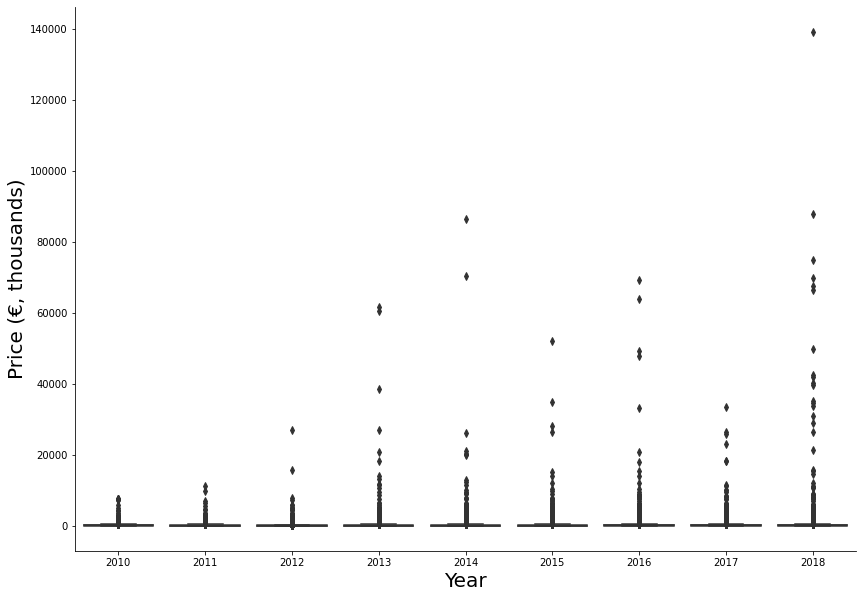

In [46]:
_ = plt.figure(figsize=(14, 10))
_ = sns.boxplot(data=df, x='Year', y='Price_thousands', palette='summer')
_ = plt.ylabel('Price (€, thousands)', fontsize=20)
_ = plt.xlabel('Year', fontsize=20)
_ = sns.despine()

plt.show()

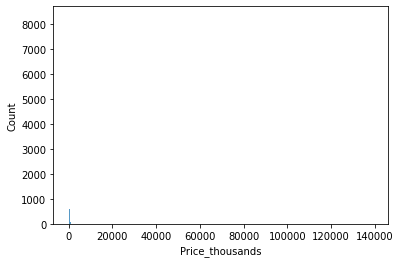

In [47]:
_ = sns.histplot(data=df, x='Price_thousands')

plt.show()

In [48]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

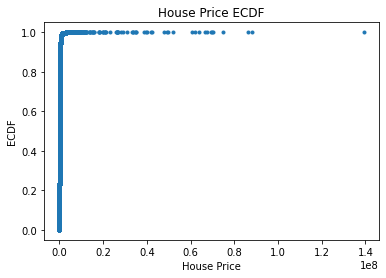

In [49]:
# Compute ECDF
x_price, y_price = ecdf(df.Price)

# Generate plot
_ = plt.plot(x_price, y_price, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('House Price')
_ = plt.ylabel('ECDF')
_ = plt.title('House Price ECDF')

# Display the plot
plt.show()

In [50]:
#from scipy import stats

#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [51]:
mean = df['Price'].mean()
std = df['Price'].std()
cut_off = std * 3

lower, upper = mean - cut_off, mean + cut_off

df_no_outliers = df[(df['Price'] < upper) & (df['Price'] > lower)]
df_outliers = df[(df['Price'] > upper) | (df['Price'] < lower)]

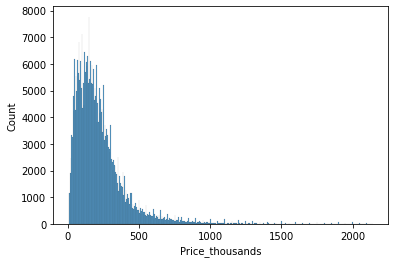

In [52]:
_ = sns.histplot(data=df_no_outliers, x='Price_thousands')

plt.show()

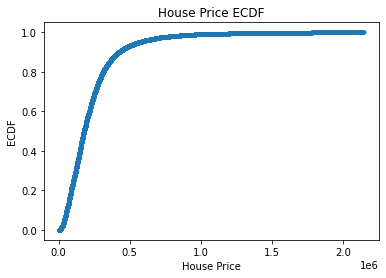

In [53]:
# Compute ECDF
x_price, y_price = ecdf(df_no_outliers.Price)

# Generate plot
_ = plt.plot(x_price, y_price, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('House Price')
_ = plt.ylabel('ECDF')
_ = plt.title('House Price ECDF')

# Display the plot
plt.show()

In [54]:
print(df.shape)
print(df_no_outliers.shape)
print(df_outliers.shape)

(348795, 14)
(347918, 14)
(877, 14)


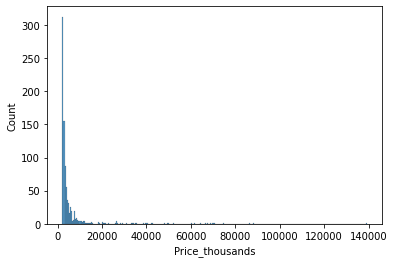

In [55]:
_ = sns.histplot(data=df_outliers, x='Price_thousands')

plt.show()

### Price Bins

Break out data into pricing bins to understand if growth is only at upper end of market. Review shows that growth is both sales below and over €2m in value.

In [56]:
price_min = np.percentile(df.Price, 0)
price_1percentile = np.percentile(df.Price, 1)
price_5percentile = np.percentile(df.Price, 5)
price_10percentile = np.percentile(df.Price, 10)
price_20percentile = np.percentile(df.Price, 20)
price_40percentile = np.percentile(df.Price, 40)
price_50percentile = np.percentile(df.Price, 50)
price_60percentile = np.percentile(df.Price, 60)
price_80percentile = np.percentile(df.Price, 80)
price_90percentile = np.percentile(df.Price, 90)
price_95percentile = np.percentile(df.Price, 95)
price_99percentile = np.percentile(df.Price, 99)
price_max = np.percentile(df.Price, 100)

In [57]:
bins = [0, 200000, 500000, 1000000, 2000000, price_max]
bin_labels = ['€200k or less', '€200k to €500k', '€500k to €1m', '€1m to €2m', '€2m or more']

df['Price_Bins'] = pd.cut(df['Price'], bins=bins, labels=bin_labels)

In [58]:
yearbins_df = df.groupby(['Price_Bins', 'Year'])['Price'].agg(['count', 'sum']).reset_index()
yearbins_df['2mill'] = yearbins_df['Price_Bins'].apply(lambda x: '€2m or more' if x == '€2m or more' else 'Less than €2m')

yearbins_df.head()

,Price_Bins,Year,count,sum,2mill
0,€200k or less,2010,10449,1.394591e+09,Less than €2m
1,€200k or less,2011,11343,1.365659e+09,Less than €2m
2,€200k or less,2012,17555,1.956385e+09,Less than €2m
3,€200k or less,2013,20785,2.141030e+09,Less than €2m
4,€200k or less,2014,28619,3.029771e+09,Less than €2m


In [59]:
yearbins_df.rename(columns={'count':'Quantity', 'sum':'Revenue'}, inplace=True)

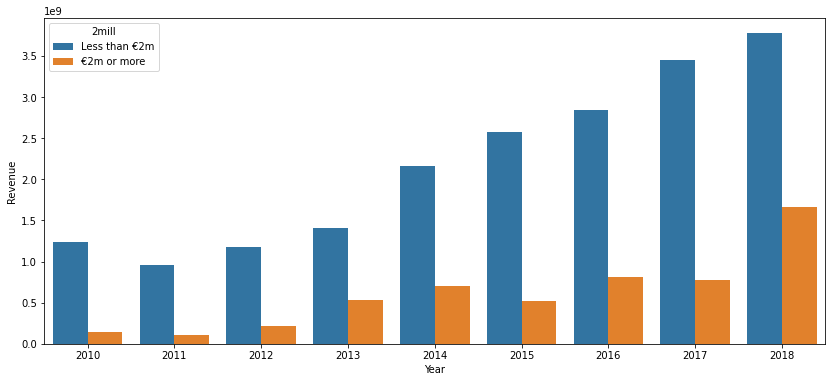

In [60]:
_ = plt.figure(figsize=(14, 6))
_ = sns.barplot(data=yearbins_df, x='Year', y='Revenue', hue='2mill', ci=None)

plt.show()

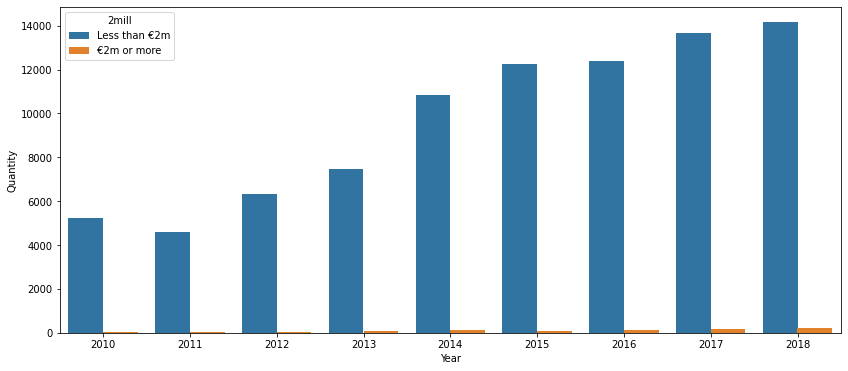

In [61]:
_ = plt.figure(figsize=(14, 6))
_ = sns.barplot(data=yearbins_df, x='Year', y='Quantity', hue='2mill', ci=None)

plt.show()

In [62]:
yearbins_df.loc[(yearbins_df['Price_Bins']=='€2m or more')]

,Price_Bins,Year,Quantity,Revenue,2mill
36,€2m or more,2010,40,1.447036e+08,€2m or more
37,€2m or more,2011,31,1.124054e+08,€2m or more
38,€2m or more,2012,56,2.127240e+08,€2m or more
39,€2m or more,2013,81,5.264904e+08,€2m or more
40,€2m or more,2014,122,7.083126e+08,€2m or more
41,€2m or more,2015,101,5.173922e+08,€2m or more
42,€2m or more,2016,144,8.136070e+08,€2m or more
43,€2m or more,2017,193,7.723968e+08,€2m or more
44,€2m or more,2018,225,1.666564e+09,€2m or more


In [63]:
#print(price_min)
#print(price_20percentile)
#print(price_40percentile)
#print(price_60percentile)
#print(price_80percentile)
#print(price_max)

### Yearly Revenue (Market Size)

Look at how the total value of housing sales increased year by year.

In [91]:
year_revenue = df.groupby(['Year'])['Price'].sum().reset_index()

In [92]:
year_revenue['Price'] = year_revenue['Price'] / 1000000000

In [93]:
year_revenue.rename(columns={'Price':'Revenue (billions)'}, inplace=True)

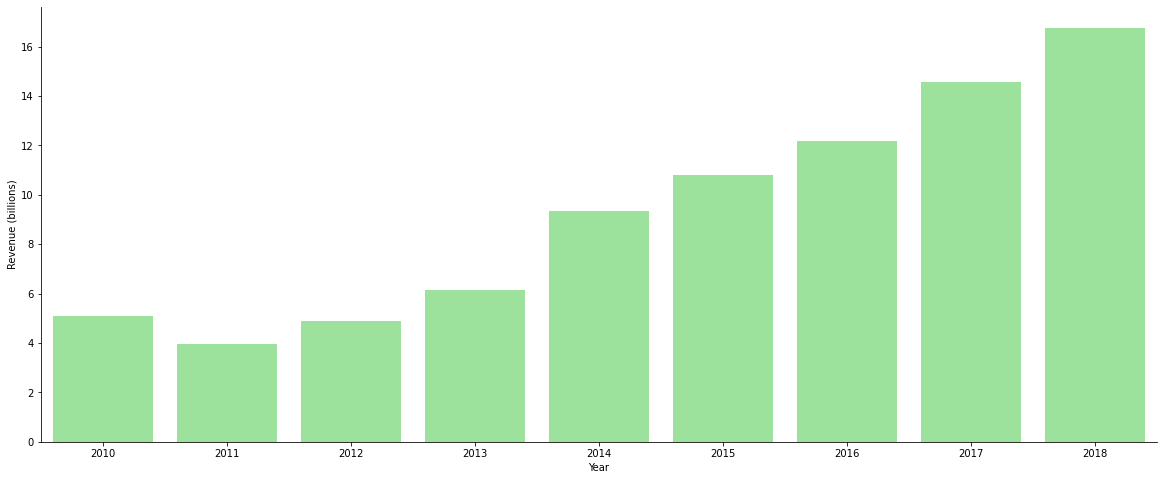

   Year  Revenue (billions)
0  2010            5.097562
1  2011            3.958984
2  2012            4.904575
3  2013            6.158529
4  2014            9.354276
5  2015           10.809077
6  2016           12.186156
7  2017           14.578404
8  2018           16.768061


In [94]:
_ = plt.figure(figsize=(20,8))
_ = sns.barplot(data=year_revenue, x='Year', y='Revenue (billions)', color='lightgreen')
_ = sns.despine()
#_ = plt.figure.spines['right'].set_visible(False)
#_ = plt.figure.spines['top'].set_visible(False)

plt.show()

print(year_revenue)

In [95]:
year_cagr = ( (float(year_revenue.loc[(year_revenue.Year == 2018)]['Revenue (billions)']) / float(year_revenue.loc[(year_revenue.Year == 2010)]['Revenue (billions)']))  ** (1 / len(year_revenue.Year)) ) - 1

In [96]:
print(round(year_cagr * 100, 2))

14.15


### Yearly Quantity and Avg Price

Look at how the volume of sales and average price of houses have increased year by year.

In [97]:
year_price_quantity = df.groupby(['Year'])['Price'].agg(['count', 'mean']).reset_index()

In [98]:
year_price_quantity.rename(columns={'count':'Quantity', 'mean':'Avg_Price'}, inplace=True)

In [99]:
#year_price_quantity.head()

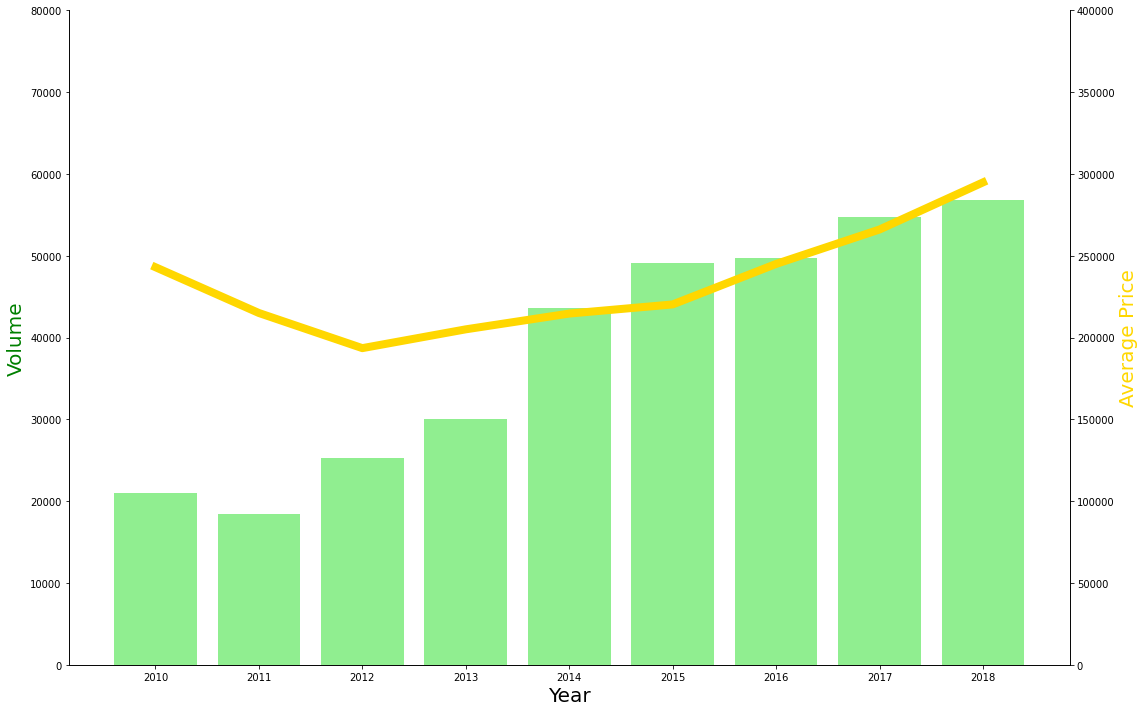

In [100]:
fig, ax = plt.subplots(figsize = (16, 10)) 
#plt.title('Volume and Average Price (2010-2018)', fontsize=40) 
  
# using the twinx() for creating another 
# axes object for secondry y-Axis 
ax2 = ax.twinx() 
ax.bar(year_price_quantity.Year, year_price_quantity.Quantity, color = 'lightgreen') 
ax2.plot(year_price_quantity.Year, year_price_quantity.Avg_Price, color = 'gold', linewidth=8) 

# Remove top border
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# giving labels to the axises 
ax.set_xlabel('Year', fontsize=20) 
ax.set_ylabel('Volume', color = 'g', fontsize=20) 

# set x-tick marks
ax.set_xticks(year_price_quantity.Year)

# set y-labels
ax.set_ylim(0,80000)
ax2.set_ylim(0,400000)

# secondary y-axis label 
ax2.set_ylabel('Average Price', color = 'gold', fontsize=20) 
  
# defining display layout  
plt.tight_layout() 
  
# show plot 
plt.show()

In [101]:
print(year_price_quantity)

   Year  Quantity      Avg_Price
0  2010     20975  243030.360938
1  2011     18411  215033.635123
2  2012     25339  193558.360266
3  2013     30034  205051.906372
4  2014     43572  214685.493197
5  2015     49071  220274.227218
6  2016     49735  245021.742879
7  2017     54791  266072.974385
8  2018     56867  294864.533019


In [102]:
year_quantity_cagr = ( (float(year_price_quantity.loc[(year_price_quantity.Year == 2018)]['Quantity']) / float(year_price_quantity.loc[(year_price_quantity.Year == 2010)]['Quantity']))  ** (1 / len(year_price_quantity.Year)) ) - 1

year_avgprice_cagr = ( (float(year_price_quantity.loc[(year_price_quantity.Year == 2018)]['Avg_Price']) / float(year_price_quantity.loc[(year_price_quantity.Year == 2010)]['Avg_Price']))  ** (1 / len(year_price_quantity.Year)) ) - 1

In [103]:
print(round(year_quantity_cagr * 100, 2))
print(round(year_avgprice_cagr * 100, 2))

11.72
2.17


### County Analysis

Look at total sales, sale volumes, average / min  / max prices by county for full dataset (2010-2018).

In [65]:
county_price = df.groupby(['County'])['Price'].agg(['sum', 'mean', 'count', 'max', 'min']).reset_index()

In [66]:
county_price.rename(columns={'count':'Quantity', 'sum':'Revenue', 'mean':'Avg Price', 'max':'Max Price', 'min':'Min Price'}, inplace=True)

In [67]:
county_price['Revenue (billions)'] = county_price['Revenue'] / 1000000000

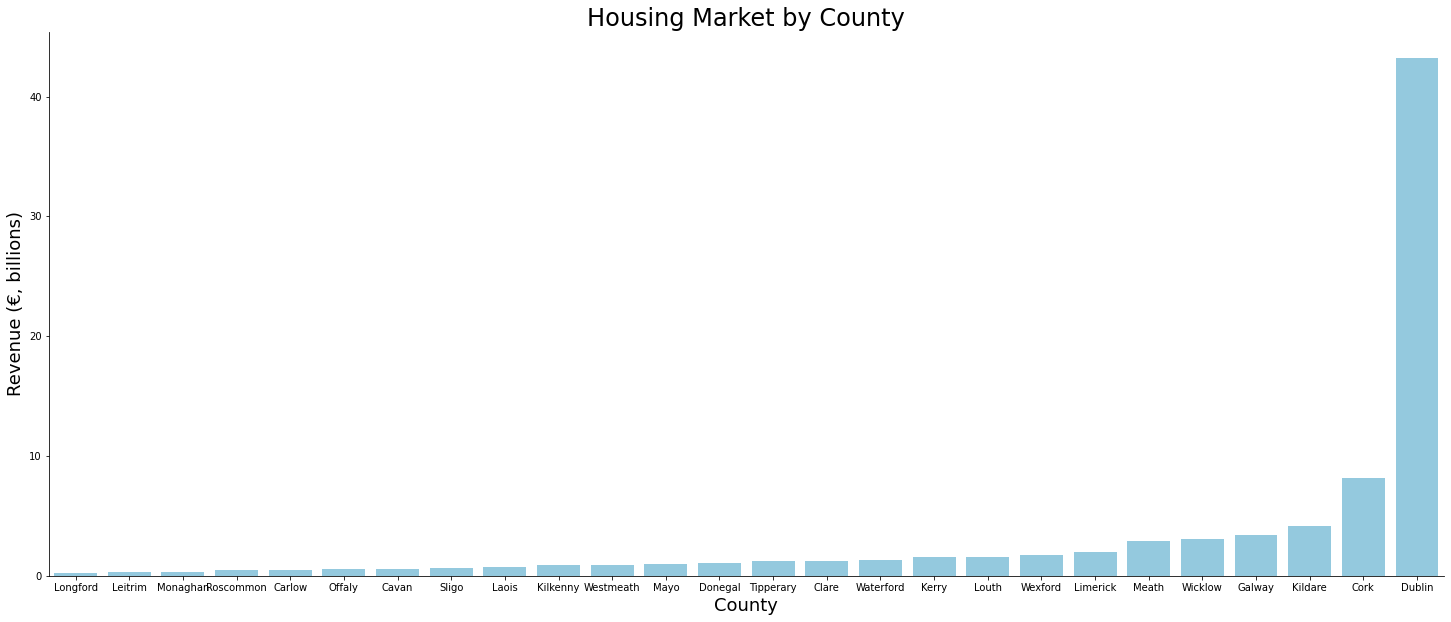

In [68]:
county_price = county_price.sort_values(by='Revenue', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_price, x='County', y='Revenue (billions)', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('Housing Market by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Revenue (€, billions)', fontsize=18)

plt.show()

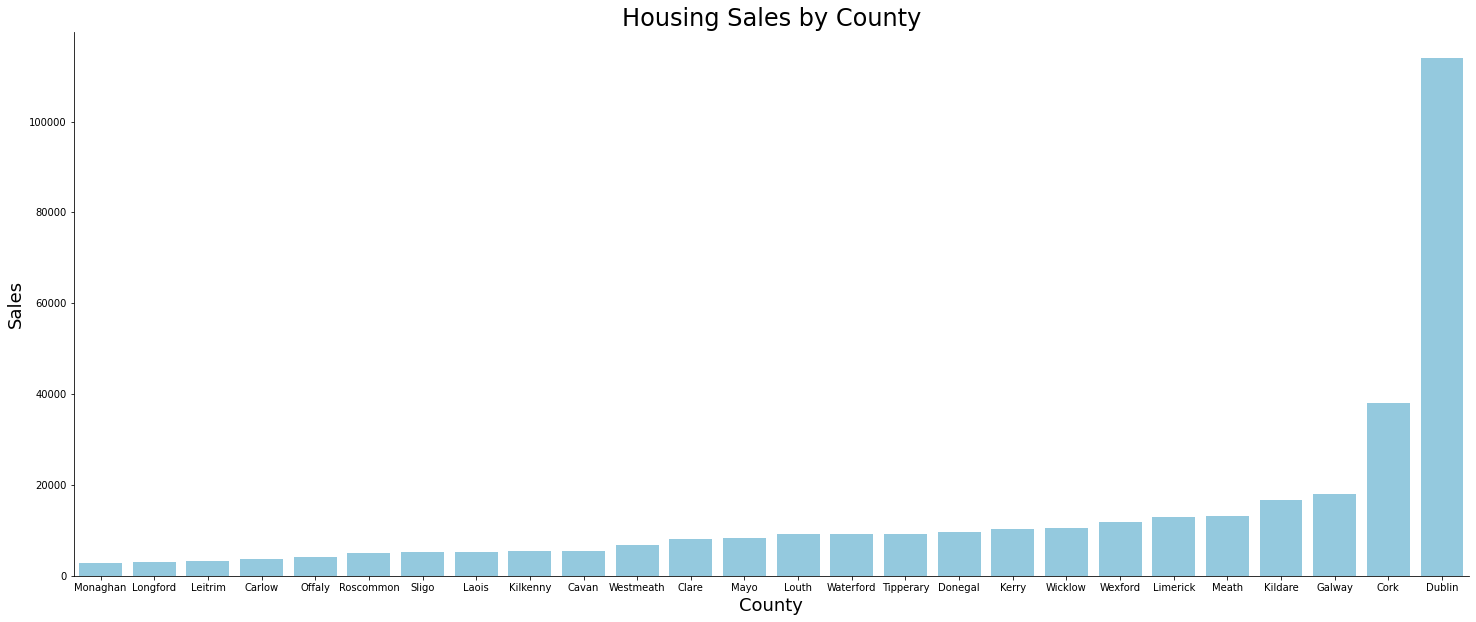

In [69]:
county_price = county_price.sort_values(by='Quantity', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_price, x='County', y='Quantity', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('Housing Sales by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Sales', fontsize=18)

plt.show()

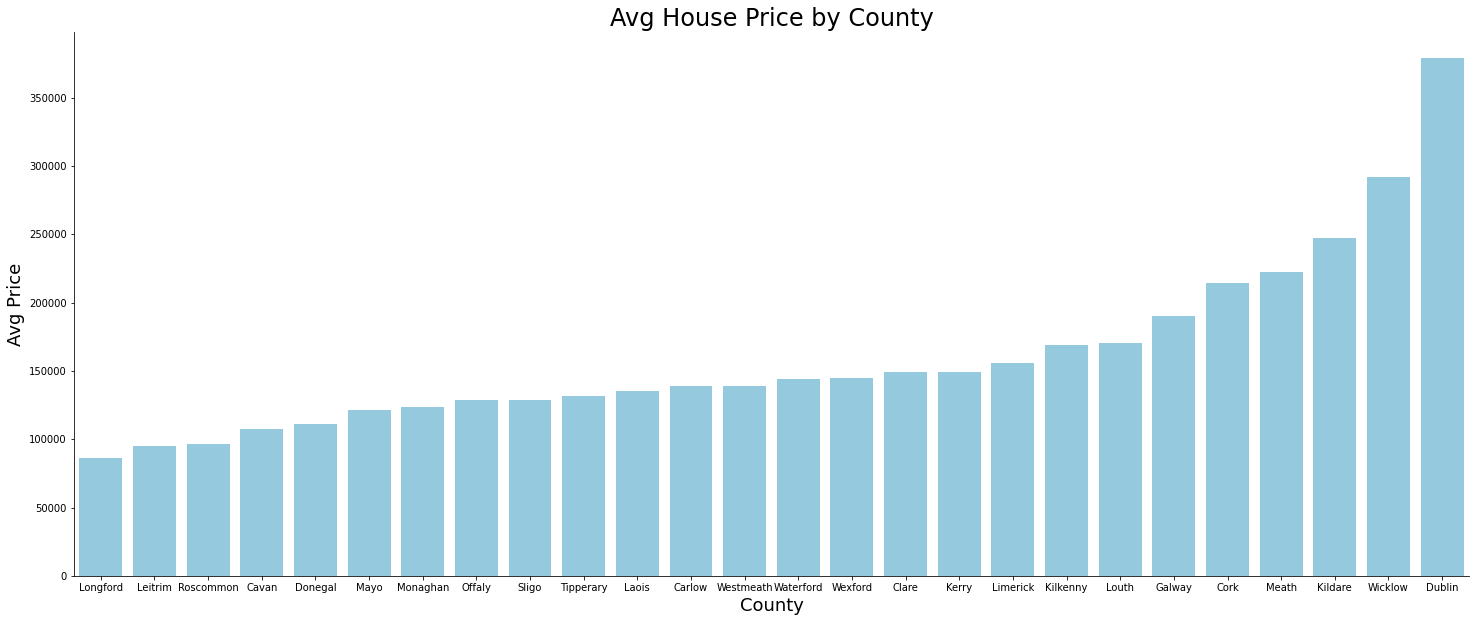

In [70]:
county_price = county_price.sort_values(by='Avg Price', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_price, x='County', y='Avg Price', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('Avg House Price by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Avg Price', fontsize=18)

plt.show()

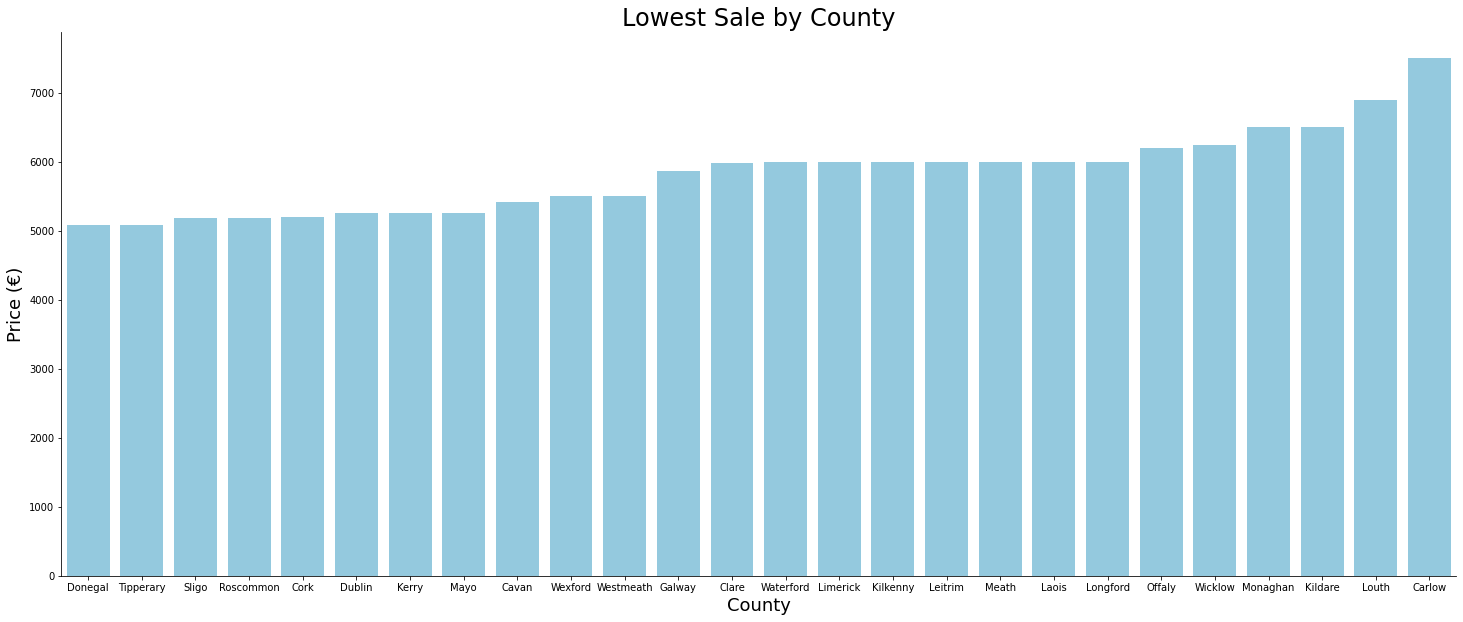

In [71]:
county_price = county_price.sort_values(by='Min Price', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_price, x='County', y='Min Price', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('Lowest Sale by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Price (€)', fontsize=18)

plt.show()

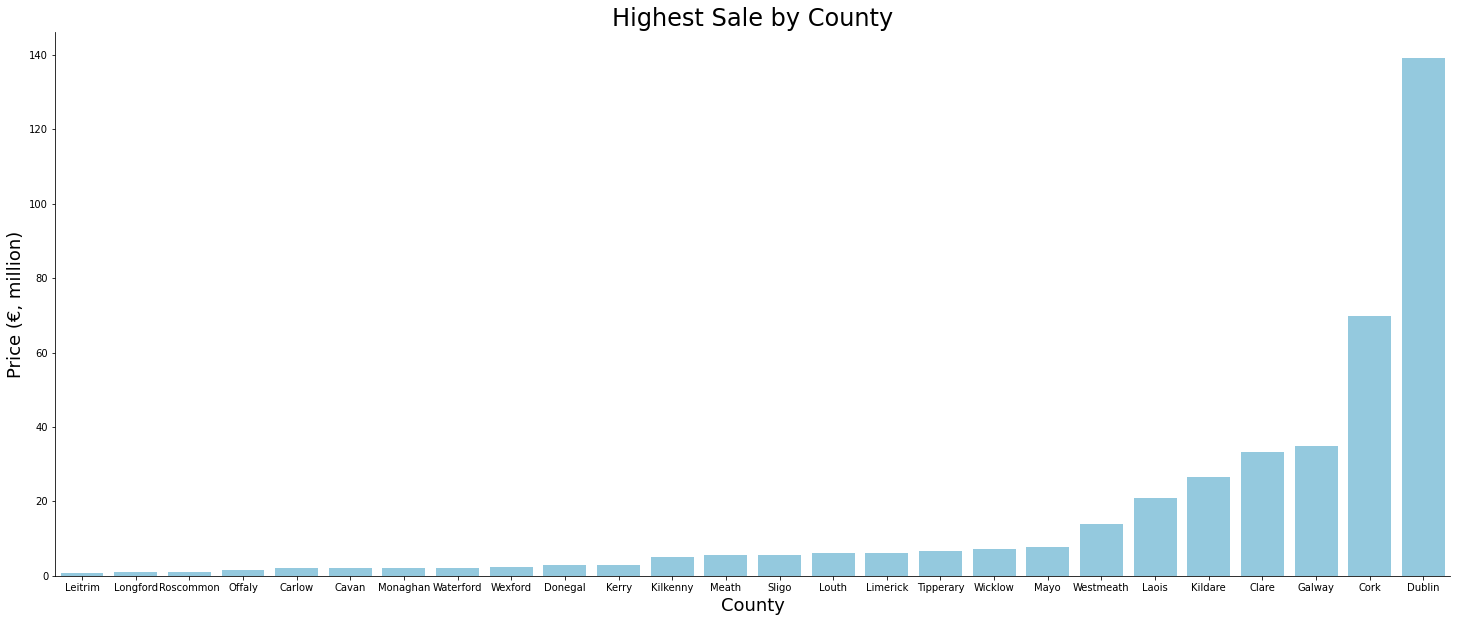

In [72]:
county_price['Max Price (millions'] = county_price['Max Price'] / 1000000
county_price = county_price.sort_values(by='Max Price', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_price, x='County', y='Max Price (millions', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('Highest Sale by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Price (€, million)', fontsize=18)


plt.show()

### County Growth

Look at how total sales, volume and average price changes between 2010 and 2018 at a county level.

In [73]:
county_year_price = df.groupby(['County', 'Year'])['Price'].agg(['sum', 'mean', 'count', 'max', 'min']).reset_index()

In [74]:
county_year_price.rename(columns={'count':'Quantity', 'sum':'Revenue', 'mean':'Avg Price', 'max':'Max Price', 'min':'Min Price'}, inplace=True)

In [75]:
county_year_price_pivot = pd.DataFrame(county_year_price.pivot(index='County', columns='Year', values='Revenue').reset_index())

In [76]:
#county_year_price_pivot.columns

In [77]:
county_year_price_pivot.drop(columns=[2011, 2012, 2013, 2014, 2015, 2016, 2017], inplace=True)

In [78]:
county_year_price_pivot['Change'] = county_year_price_pivot[2018] - county_year_price_pivot[2010]

In [79]:
#county_year_price_pivot.head()

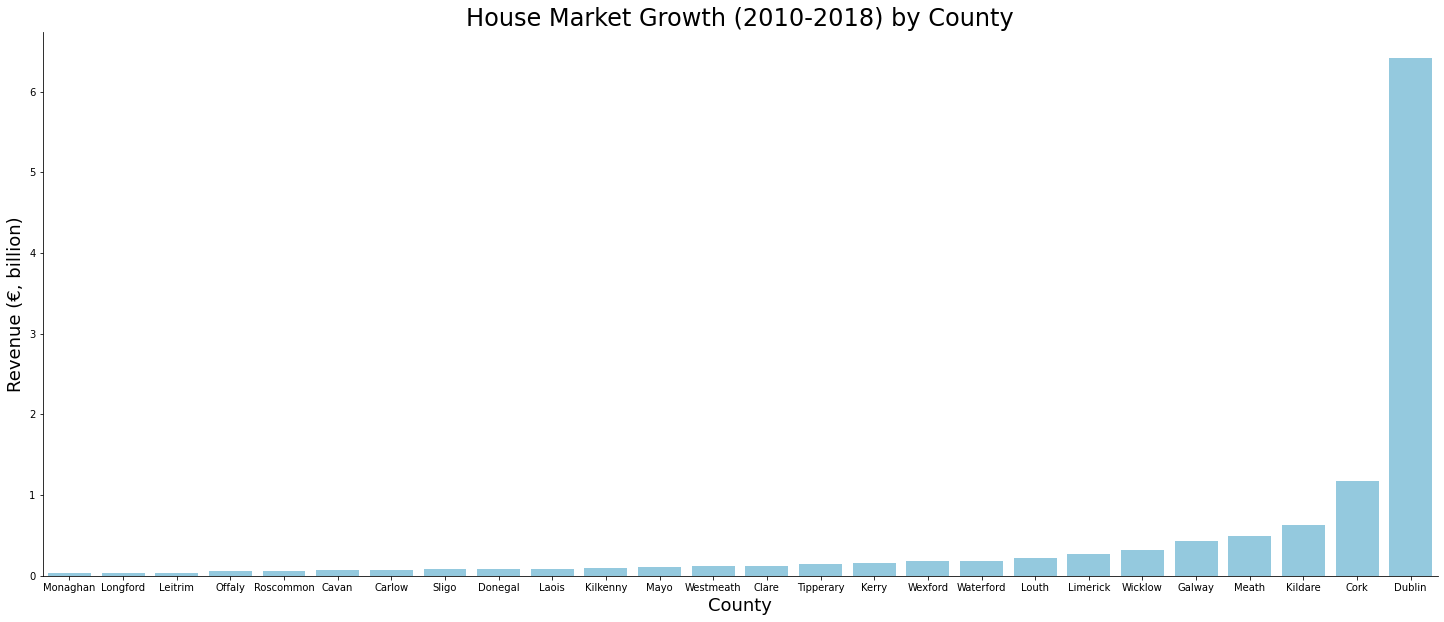

Year     County          2010          2018        Change  Change (billions)
17     Monaghan  3.373417e+07  6.260900e+07  2.887484e+07           0.028875
13     Longford  1.978083e+07  4.876222e+07  2.898139e+07           0.028981
11      Leitrim  1.831807e+07  5.457490e+07  3.625683e+07           0.036257
18       Offaly  3.878949e+07  9.988759e+07  6.109810e+07           0.061098
19    Roscommon  3.928738e+07  1.005920e+08  6.130461e+07           0.061305
1         Cavan  4.302622e+07  1.117308e+08  6.870459e+07           0.068705
0        Carlow  4.037197e+07  1.167291e+08  7.635717e+07           0.076357
20        Sligo  5.222391e+07  1.310407e+08  7.881682e+07           0.078817
4       Donegal  9.634704e+07  1.753597e+08  7.901263e+07           0.079013
10        Laois  5.439346e+07  1.349616e+08  8.056818e+07           0.080568
9      Kilkenny  7.199962e+07  1.694082e+08  9.740860e+07           0.097409
15         Mayo  6.727628e+07  1.709046e+08  1.036283e+08           0.103628

In [80]:
county_year_price_pivot['Change (billions)'] = county_year_price_pivot['Change'] / 1000000000
county_year_price_pivot = county_year_price_pivot.sort_values(by='Change', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_year_price_pivot, x='County', y='Change (billions)', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('House Market Growth (2010-2018) by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Revenue (€, billion)', fontsize=18)

plt.show()

print(county_year_price_pivot)

In [81]:
county_year_count_pivot = pd.DataFrame(county_year_price.pivot(index='County', columns='Year', values='Quantity').reset_index())
county_year_count_pivot.drop(columns=[2011, 2012, 2013, 2014, 2015, 2016, 2017], inplace=True)
county_year_count_pivot['Change'] = county_year_count_pivot[2018] - county_year_count_pivot[2010]

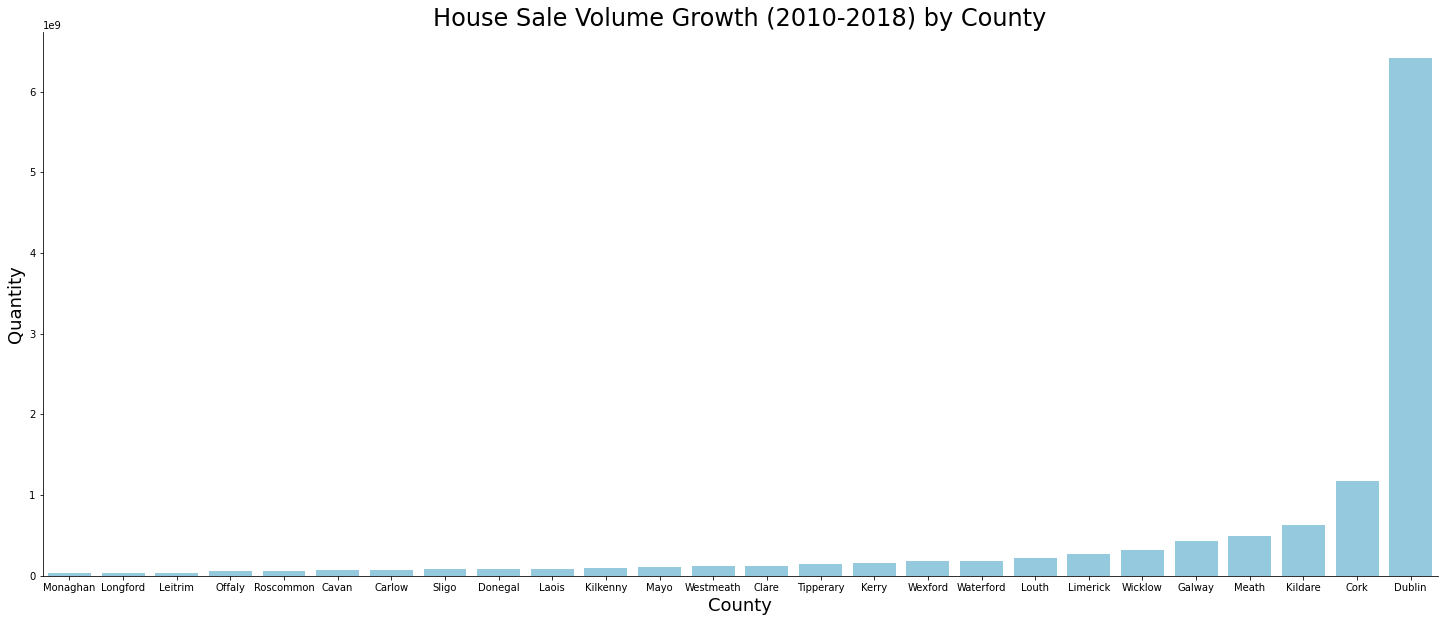

In [82]:
county_year_count_pivot = county_year_count_pivot.sort_values(by='Change', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_year_price_pivot, x='County', y='Change', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('House Sale Volume Growth (2010-2018) by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Quantity', fontsize=18)

plt.show()

In [83]:
county_year_avgprice_pivot = pd.DataFrame(county_year_price.pivot(index='County', columns='Year', values='Avg Price').reset_index())
county_year_avgprice_pivot.drop(columns=[2011, 2012, 2013, 2014, 2015, 2016, 2017], inplace=True)
county_year_avgprice_pivot['Change'] = county_year_avgprice_pivot[2018] - county_year_avgprice_pivot[2010]

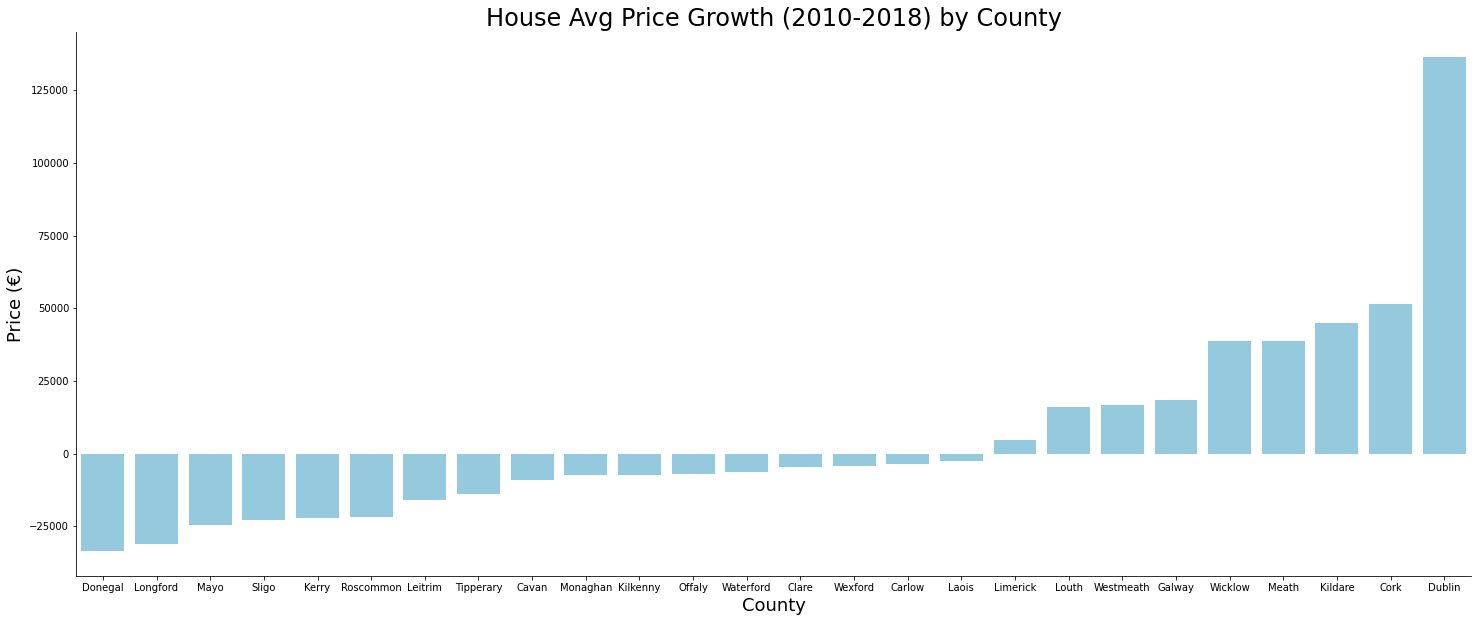

In [84]:
county_year_avgprice_pivot = county_year_avgprice_pivot.sort_values(by='Change', ascending=True)

_ = plt.figure(figsize=(25, 10))
_ = sns.barplot(data=county_year_avgprice_pivot, x='County', y='Change', color='skyblue', ci=None)
_ = sns.despine()

_ = plt.title('House Avg Price Growth (2010-2018) by County', fontsize=24)
_ = plt.xlabel('County', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Price (€)', fontsize=18)

plt.show()

In [85]:
print(county_year_avgprice_pivot)

Year     County           2010           2018         Change
4       Donegal  151966.947934  118486.268507  -33480.679427
13     Longford  136419.506483  105317.960907  -31101.545576
15         Mayo  158670.481179  134253.440353  -24417.040826
20        Sligo  163199.733844  140300.574229  -22899.159615
7         Kerry  188121.487576  166172.051639  -21949.435936
19    Roscommon  137850.440140  116157.028268  -21693.411872
11      Leitrim  128098.378252  112294.024033  -15804.354219
21    Tipperary  161488.060542  147747.581373  -13740.479170
1         Cavan  142470.942781  133330.329236   -9140.613545
17     Monaghan  153337.119000  145941.735851   -7395.383149
9      Kilkenny  209911.419155  202641.401699   -7270.017456
18       Offaly  159627.536296  152500.136198   -7127.400098
22    Waterford  181549.269322  175349.231924   -6200.037398
2         Clare  175999.191917  171564.920984   -4434.270933
24      Wexford  179564.317524  175395.813056   -4168.504468
0        Carlow  174017.

### Bubble Charts

Look to condense the information in last section to show how Dublin is growing a much faster rate than the rest of Ireland by using bubble charts.

In [86]:
county_2010 = county_year_price.loc[(county_year_price['Year']==2010)].drop(columns=['Year', 'Max Price', 'Min Price'])

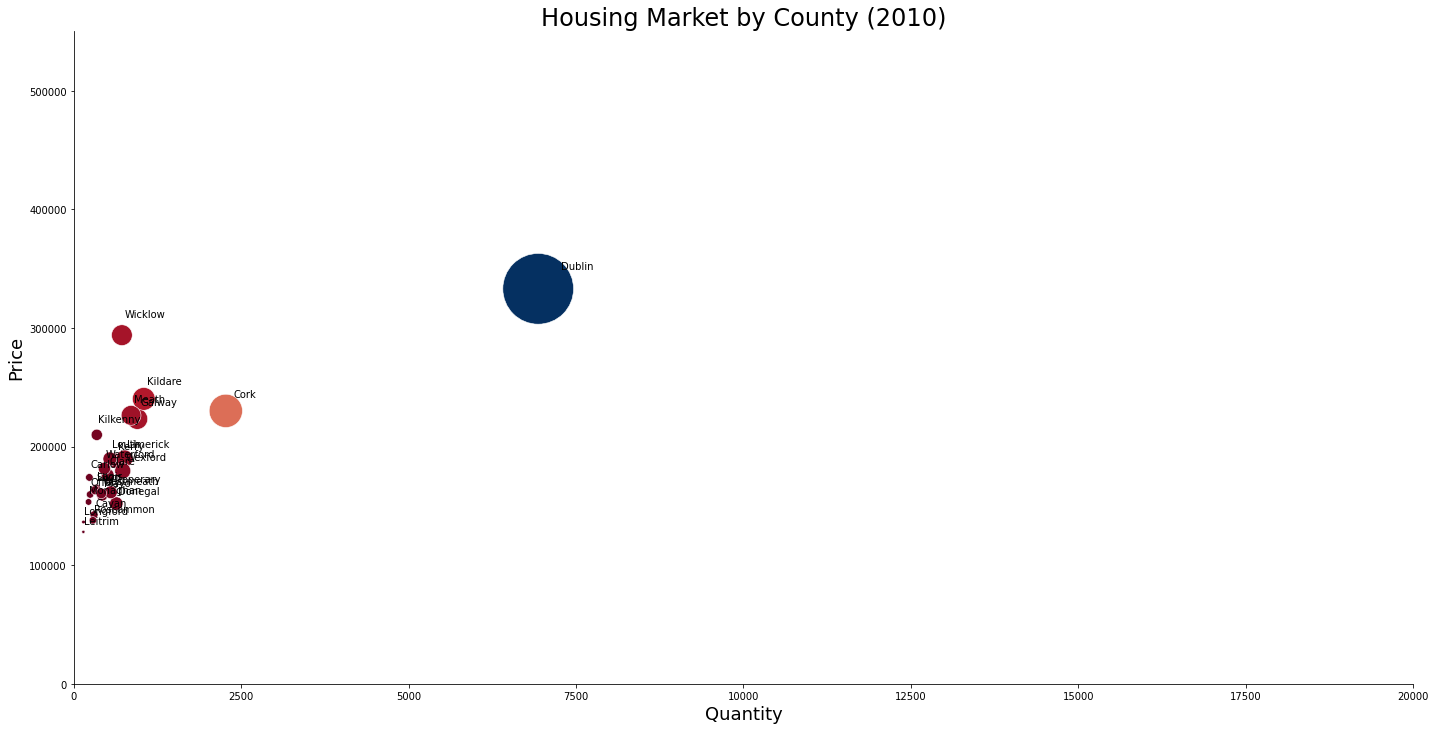

In [87]:
_ = plt.figure(figsize=(24,12))
_ = sns.scatterplot(data=county_2010, x='Quantity', y='Avg Price', size='Revenue', hue='Revenue', sizes=(10,5000), legend=False, palette='RdBu')
_ = sns.despine()

_ = plt.ylim(0,550000)
_ = plt.xlim(0,20000)

_ = plt.title('Housing Market by County (2010)', fontsize=24)
_ = plt.xlabel('Quantity', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Price', fontsize=18)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + point['x']/20, point['y'] + point['y']/20, str(point['val']))

label_point(county_2010.Quantity, county_2010['Avg Price'], county_2010.County, plt.gca()) 

plt.show()

In [88]:
county_2018 = county_year_price.loc[(county_year_price['Year']==2018)].drop(columns=['Year', 'Max Price', 'Min Price'])

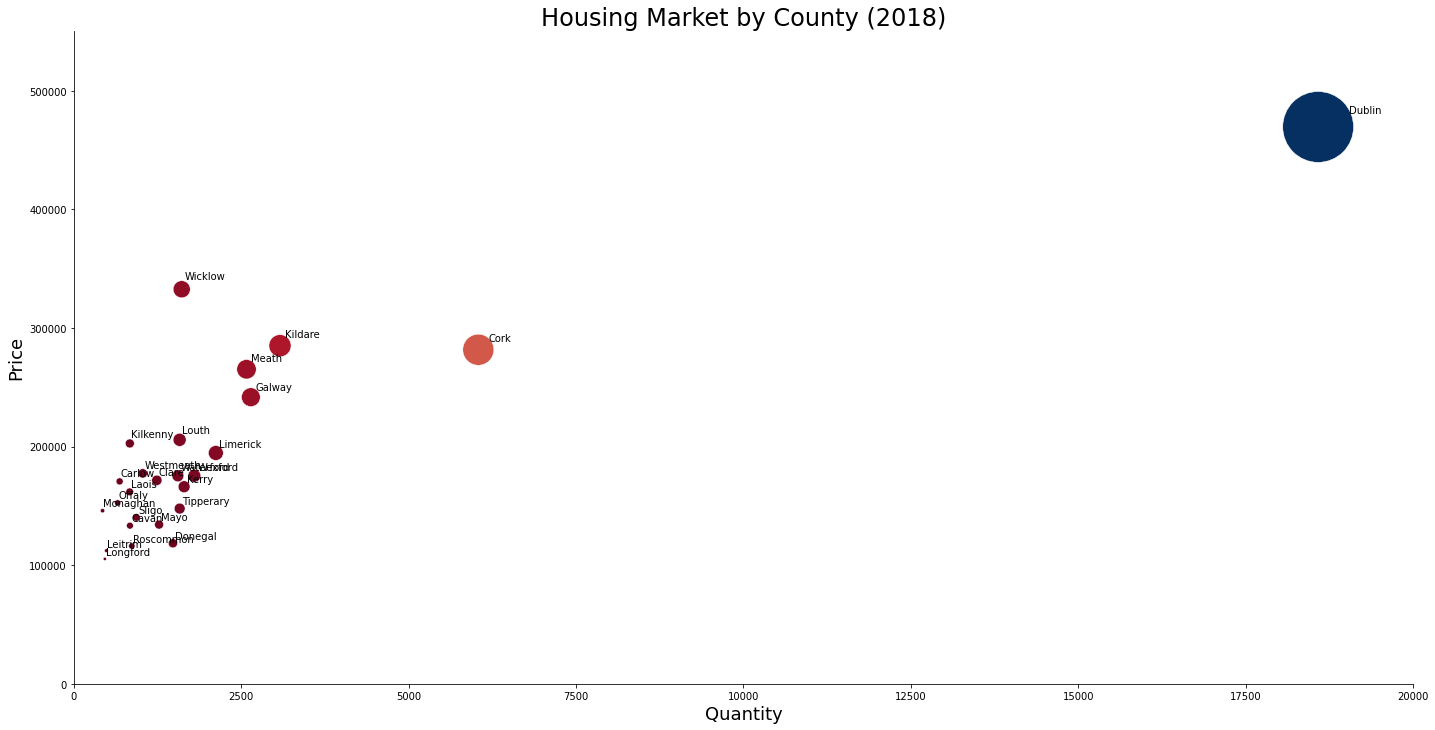

In [89]:
_ = plt.figure(figsize=(24,12))
_ = sns.scatterplot(data=county_2018, x='Quantity', y='Avg Price', size='Revenue', hue='Revenue', sizes=(10,5000), legend=False, palette='RdBu')
_ = sns.despine()

_ = plt.ylim(0,550000)
_ = plt.xlim(0,20000)

_ = plt.title('Housing Market by County (2018)', fontsize=24)
_ = plt.xlabel('Quantity', fontsize=18)
_ = plt.xticks(fontsize=10)
_ = plt.ylabel('Price', fontsize=18)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + point['x']/40, point['y'] + point['y']/40, str(point['val']))

label_point(county_2018.Quantity, county_2018['Avg Price'], county_2018.County, plt.gca()) 

plt.show()

In [90]:
#_ = plt.figure(figsize=(12,6))
#_ = sns.lineplot(x='Date of Sale', y='Price (€)', data=df)

#plt.show()

### Share of New vs Second Hand

Look to see if increased growth may be due to more new and / or expensive housing becoming available.

In [104]:
property_type_year = df.groupby(['Year', 'Property Type'])['Price'].agg(['count', 'mean']).reset_index()

In [105]:
property_type_year.head()

,Year,Property Type,count,mean
0,2010,Existing,15666,253264.331903
1,2010,New,5309,212831.568484
2,2011,Existing,15461,219202.034931
3,2011,New,2950,193186.981078
4,2012,Existing,22169,196011.233637


In [106]:
property_type_stack_count = property_type_year.pivot(index='Year', columns='Property Type', values='count').reset_index()
property_type_stack_count['New (%)'] = property_type_stack_count['New'] / (property_type_stack_count['New'] + property_type_stack_count['Existing'])
property_type_stack_count['Existing (%)'] = property_type_stack_count['Existing'] / (property_type_stack_count['New'] + property_type_stack_count['Existing'])
property_type_stack_count = property_type_stack_count[['Year', 'Existing (%)', 'New (%)']]

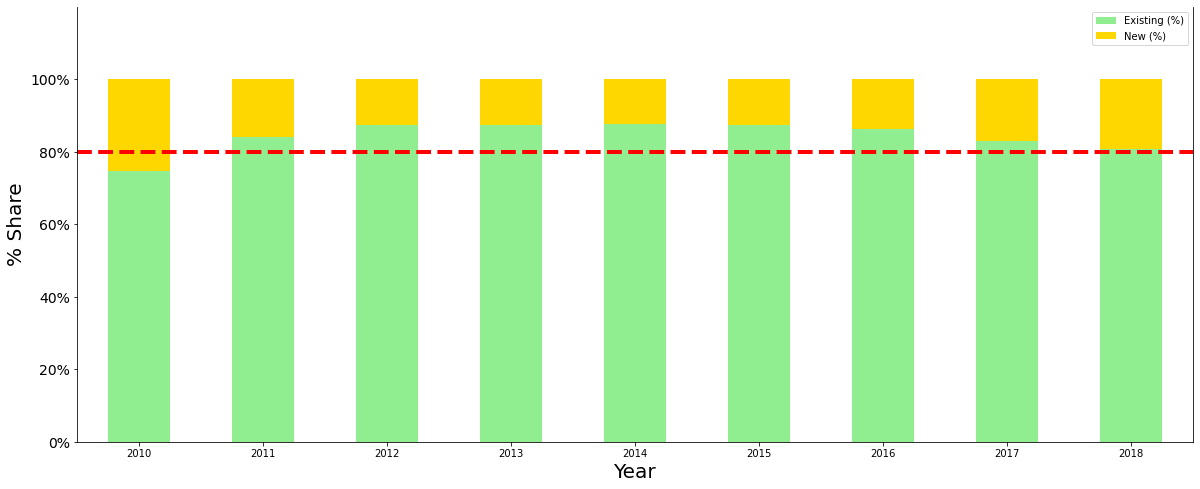

In [107]:

#_ = plt.bar(x=property_type_stack_count['Year'])
stack = property_type_stack_count.plot.bar(x='Year', stacked=True, figsize=(20,8), color=['lightgreen', 'gold'])

stack.spines['top'].set_visible(False)
stack.legend(loc='upper right')
plt.xticks(rotation=0)
plt.ylim(0,1.2)
plt.axhline(0.8, color='r', linestyle='--', linewidth=4)
stack.set_yticks([0,0.2,0.4,0.6,0.8,1])
stack.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=14)

#plt.title('New or Existing Properties (% of purchases)', fontsize=20)
plt.ylabel('% Share', fontsize=20)
plt.xlabel('Year', fontsize=20)

plt.show()

In [108]:
print('Average New House Price: ', df.loc[(df['Property Type']=='New')]['Price'].mean())
print('Average Existing House Price: ', df.loc[(df['Property Type']=='Existing')]['Price'].mean())

Average New House Price:  255302.1601438154
Average Existing House Price:  237555.1547055692


In [109]:
property_type_avgprice = df.groupby(['Property Type'])['Price'].mean().reset_index()

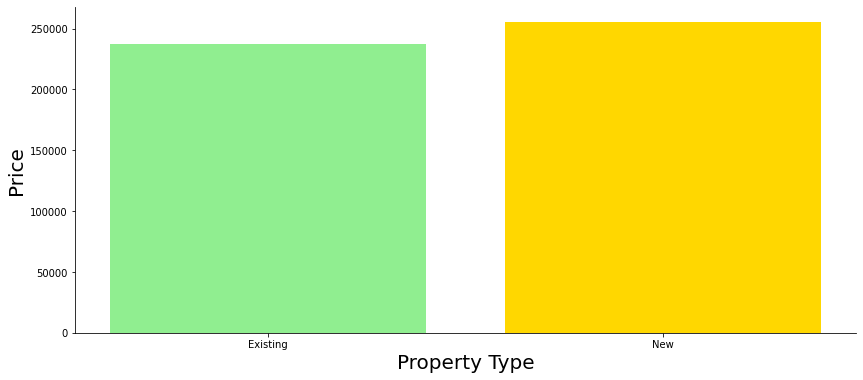

In [110]:
_ = plt.figure(figsize=(14,6))
#_ = sns.barplot(data=property_type_avgprice, x='Property Type', y='Price', color=['green', 'yellow'])
_ = plt.bar(x='Property Type',height='Price',data=property_type_avgprice, width=0.8, color=['lightgreen','gold'])
_ = sns.despine()
_ = plt.ylabel('Price', fontsize=20)
_ = plt.xlabel('Property Type', fontsize=20)
#_ = plt.figure.spines['right'].set_visible(False)
#_ = plt.figure.spines['top'].set_visible(False)

plt.show()

### Share of VAT Exclusive

VAT exclusive graphs show to be the exact same as New vs Existing. This seems to indicate that prices for New properties excluded the VAT value where as old properties have this included.

After a bit of research this makes sense as general rule is that 'the general rule is that you are required to charge VAT on the sale of a new completed property and not on the sale of an old property.'

https://www2.deloitte.com/ie/en/pages/tax/articles/vat-property-sales.html

In [111]:
VAT_year = df.groupby(['Year', 'VAT_exc'])['Price'].agg(['count', 'mean']).reset_index()

In [112]:
VAT_year.head()

,Year,VAT_exc,count,mean
0,2010,No,15779,252440.760619
1,2010,Yes,5196,214453.244584
2,2011,No,15573,218742.793302
3,2011,Yes,2838,194680.315772
4,2012,No,22312,195640.711089


In [113]:
VAT_stack_count = VAT_year.pivot(index='Year', columns='VAT_exc', values='count').reset_index()
VAT_stack_count['No (%)'] = VAT_stack_count['No'] / (VAT_stack_count['No'] + VAT_stack_count['Yes'])
VAT_stack_count['Yes (%)'] = VAT_stack_count['Yes'] / (VAT_stack_count['No'] + VAT_stack_count['Yes'])
VAT_stack_count = VAT_stack_count[['Year', 'No (%)', 'Yes (%)']]

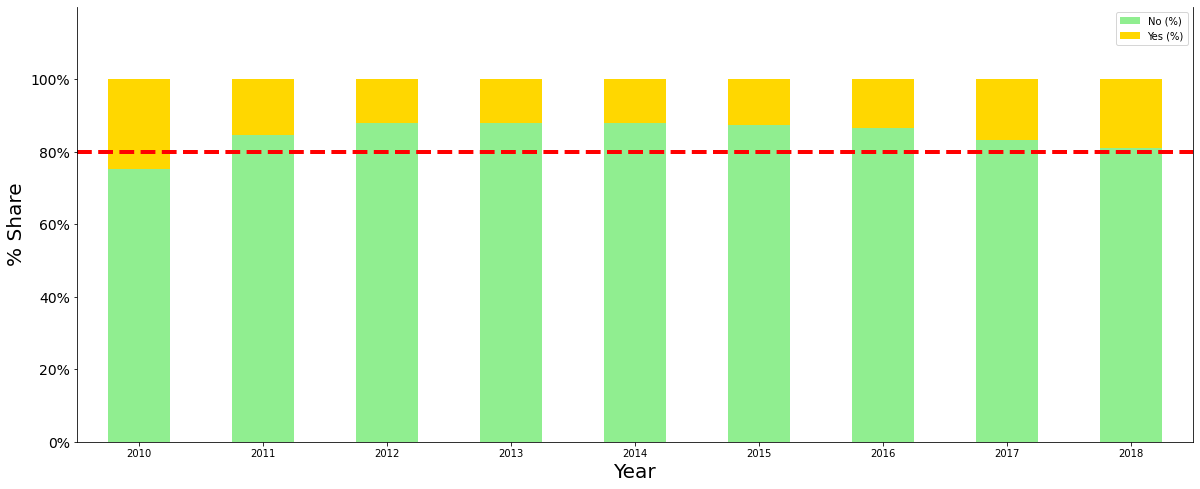

In [114]:
stack = VAT_stack_count.plot.bar(x='Year', stacked=True, figsize=(20,8), color=['lightgreen', 'gold'])

stack.spines['top'].set_visible(False)
stack.legend(loc='upper right')
plt.xticks(rotation=0)
plt.ylim(0,1.2)
plt.axhline(0.8, color='r', linestyle='--', linewidth=4)
stack.set_yticks([0,0.2,0.4,0.6,0.8,1])
stack.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=14)

#plt.title('New or Existing Properties (% of purchases)', fontsize=20)
plt.ylabel('% Share', fontsize=20)
plt.xlabel('Year', fontsize=20)

plt.show()

In [115]:
print('Average VAT exclusive House Price: ', df.loc[(df['VAT_exc']=='Yes')]['Price'].mean())
print('Average VAT inclusive House Price: ', df.loc[(df['VAT_exc']=='No')]['Price'].mean())

Average VAT exclusive House Price:  253811.59656688047
Average VAT inclusive House Price:  237896.8121710575


In [116]:
df.loc[(df['Property Type']=='Existing') & df['VAT_exc']=='Yes']

,Address,Postal Code,County,Price,Not_Full_Price,VAT_exc,Date of Sale,Year,Month,Property Type,Address 1,Address 2,Address 3,Price_thousands,Price_Bins


### Not Full Price

The percentage not paying full market price seems to be steady over time.

In [117]:
fullprice_year = df.groupby(['Year', 'Not_Full_Price'])['Price'].agg(['count', 'mean']).reset_index()

In [118]:
fullprice_year.head()

,Year,Not_Full_Price,count,mean
0,2010,No,19876,246894.868049
1,2010,Yes,1099,173138.692739
2,2011,No,17318,221596.224324
3,2011,Yes,1093,111052.921683
4,2012,No,23641,201322.237872


In [119]:
fullprice_stack_count = fullprice_year.pivot(index='Year', columns='Not_Full_Price', values='count').reset_index()
fullprice_stack_count['No (%)'] = fullprice_stack_count['No'] / (fullprice_stack_count['No'] + fullprice_stack_count['Yes'])
fullprice_stack_count['Yes (%)'] = fullprice_stack_count['Yes'] / (fullprice_stack_count['No'] + fullprice_stack_count['Yes'])
fullprice_stack_count = fullprice_stack_count[['Year', 'No (%)', 'Yes (%)']]

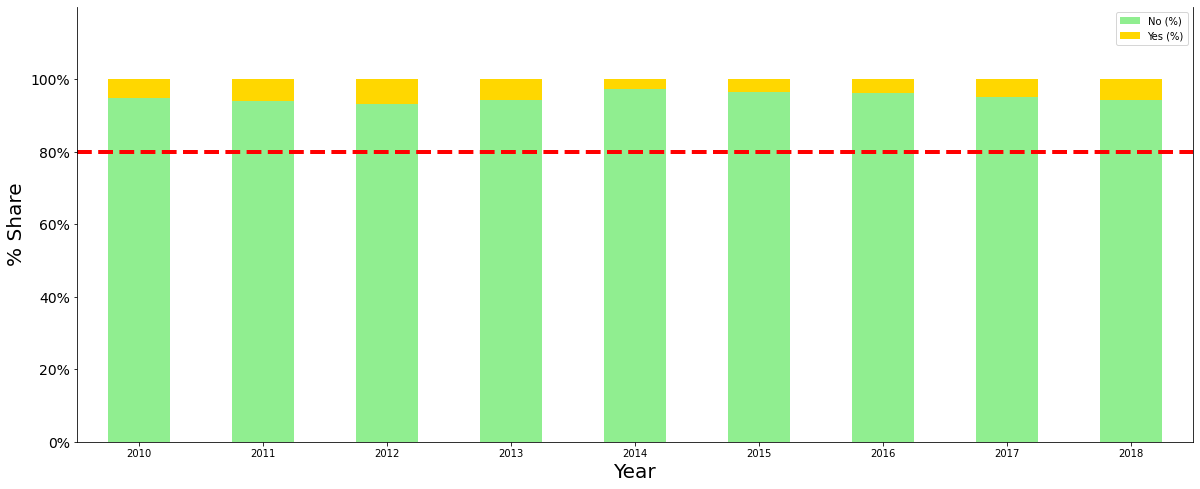

In [120]:
stack = fullprice_stack_count.plot.bar(x='Year', stacked=True, figsize=(20,8), color=['lightgreen', 'gold'])

stack.spines['top'].set_visible(False)
stack.legend(loc='upper right')
plt.xticks(rotation=0)
plt.ylim(0,1.2)
plt.axhline(0.8, color='r', linestyle='--', linewidth=4)
stack.set_yticks([0,0.2,0.4,0.6,0.8,1])
stack.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=14)

#plt.title('New or Existing Properties (% of purchases)', fontsize=20)
plt.ylabel('% Share', fontsize=20)
plt.xlabel('Year', fontsize=20)

plt.show()

## Future Ideas


* Look to bring in other data sources like population or income by county or region